# Hist 3368 - Week 3 - Using Ngrams to Interpret Gender

This notebook generates visualizations that will be used for the writing assignment this week.

### Load and clean some data

In [26]:
import nltk, numpy, re, matplotlib
import pandas as pd
import re
from textblob import TextBlob
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
import matplotlib.pyplot as plt

In [11]:
cd /scratch/group/history/hist_3368-jguldi

/scratch/group/history/hist_3368-jguldi


In [12]:
with open('senseandsensibility.txt', 'r') as myfile:
    sas_data = myfile.read().split('\n\n"I suppose you know, ma\'am, that Mr. Ferrars is married"\n\nIt _was_ Edward\n\n"Everything in such respectable condition"\n\n ')[1].split('THE END')[0].strip()
with open('emma.txt', 'r') as myfile:
    emma_data = myfile.read().split('CHAPTER I')[1].split('FINIS')[0].strip()
with open('prideandprejudice.txt', 'r') as myfile:
    pap_data = myfile.read().split('CHAPTER I')[1].split('End of the Project Gutenberg EBook of Pride and Prejudice, by Jane Austen')[0].strip()
data = [sas_data, emma_data, pap_data]

# clean up
for novel in data:
    novel = re.sub('[\",.;:?([)\]_*]', '', novel)
    words = novel.replace('\n', ' ').lower().split()

### Extract Ngrams

In [23]:
allbigrams = []

# extract ngrams where n is set at 2
for novel in data:
    bigrams = TextBlob(novel).ngrams(n=2)
    for bigram in bigrams:
        bigram2 = list(bigram)
        allbigrams.append(bigram2)
    
allbigrams[:5]

[['CHAPTER', 'I'],
 ['I', 'The'],
 ['The', 'family'],
 ['family', 'of'],
 ['of', 'Dashwood']]

In [25]:
###################
# stopword the bigram list -- two options
# stopwording either word in the bigram
anycleanbigramlist = []
for bigram in allbigrams: # cycle through each bigram in the bigram list
    bigram = list(bigram)
    for word in bigram:
        if any(word not in stopwords for word in bigram): # if all the words in the bigram are non-stopwords, then:
            bigram2 = bigram[0] + ' ' + bigram[1] # glue the split words back into a phrase with a space in the middle
            anycleanbigramlist.append(bigram2) # use double brackets to grab the whole row -- including the index
print('### top bigrams with any word stopworded')
print(pd.Series.value_counts(anycleanbigramlist)[:5]) # show just the top 30

### top bigrams with any word stopworded
I am            464
Mrs Jennings    464
I have          406
could not       332
her sister      274
dtype: int64


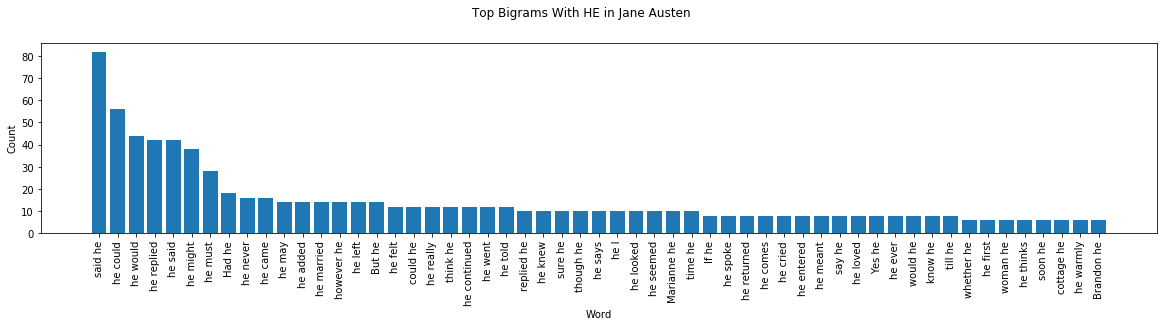

In [29]:
###################
# filter stopworded lists for 'he' 
pattern = re.compile("\\bhe\\b")

he_bigrams = [] 
for bigram in anycleanbigramlist:
    if re.search(pattern, bigram):
        he_bigrams.append(bigram)
mostcommon = pd.Series.value_counts(he_bigrams)[:55] 

#######
# a well-labeled barplot
plt.figure(figsize = (20, 5))
plt.subplots_adjust(bottom=0.35) # add some padding at the bottom so that the labels don't get cut off
plt.bar(list(mostcommon.index), mostcommon) # tell the barplot what to put on the x and y axes
plt.xticks(rotation=90) # this tells Python to 'rotate' the labels on the x axis so that the words fit on the screen
plt.savefig('bar.png') # this line tells Python to save a copy in your digital-history folder
plt.xlabel('Word') # this line labels the x axis
plt.ylabel('Count') # this line labels the y axis
plt.suptitle('Top Bigrams With HE in Jane Austen') #This line labels the title
plt.savefig('he-bigrams.png', dpi = 300) # save the figure
plt.show()

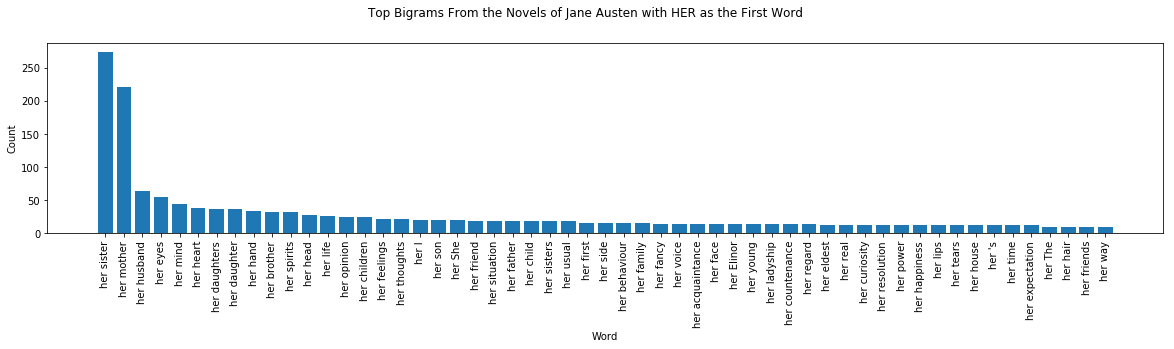

In [31]:
###################
# filter stopworded lists for 'her' as the first word 
pattern = re.compile("\\bher\\b")

he_bigrams = [] 
for bigram in anycleanbigramlist:
    bigram2 = bigram.split() ### <- note the .split() 
    if re.search(pattern, bigram2[0]): ### <-- note the [0] to find the first word. change to [1] to find the second word
            he_bigrams.append(bigram)
    
import matplotlib.pyplot as plt

#######
# a well-labeled barplot
plt.figure(figsize = (20, 5))
mostcommon = pd.Series.value_counts(he_bigrams)[:55]
plt.subplots_adjust(bottom=0.35)

plt.bar(list(mostcommon.index), mostcommon)
plt.xticks(rotation=90) # this tells Python to 'rotate' the labels on the x axis so that the words fit on the screen
plt.savefig('bar.png') # this line tells Python to save a copy in your digital-history folder
plt.xlabel('Word') # this line labels the x axis
plt.ylabel('Count') # this line labels the y axis
plt.suptitle('Top Bigrams From the Novels of Jane Austen with HER as the First Word ') #This line labels the title
plt.savefig('her-0-bigrams.png', dpi = 300)
plt.show()

## Assignment

1) Use the code above to generate 6 graphs:
    
   - Two for comparing 'he' and 'she'
   - Two for comparing 'his' and 'her' (where 'her' is used as the possessive, i.e. the first word in the bigram)
   - Two for comparing 'him' and 'her' (where 'her' is used as direct object, or the second word in the bigram)

Cut and paste the resulting graphs into a Word document. Label them so that you can refer to them (Figure 1, etc.).

2) Write a series of paragraphs comparing how men and women are talked about in Jane Austen. Use all the words from all six charts in your discussion. 

In an essay of at least one page, citing individual words throughout, make an argument and provide detailed evidence for your answer.  You should discuss in your essay all of the words you have noted in your charts.

The examples may be discussed in a list ("Austen uses the verbs 'play,' 'sing,' and 'make merry' to talk about what the sisters did in their spare time.")  Make sure that anything you say about a group of words is accurate for each word you talk about in that sentence. 

Turn in a Word Document with a clear thesis -- that is, a single argument supported by all of your data and analysis.


